# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [3]:
# see how many >50K values there are 

num_sum = (df['income_binary'] == '>50K').sum()
percentage = num_sum / df.shape[0]
display(num_sum, percentage)

7841

0.2408095574460244

In [4]:
# see the features

list(df.columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex_selfID',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income_binary']

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I chose the census dataset. 

I want to be able to predict someone's income level (if it is above >50K), and I will use the label 'income_binary'

This is a supervised learning and classification problem. It will be binary classification as it will predict if someones income is >50k or <=50k.

My intended features will be age, education, education-num, marital-status, occupation, capital-gain, capital-loss, and hours-per-week.

This will probably be useful for luxury and high-end companies, who want to target consumers of higher income that can afford their products. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
# analyzing the data

display(df.head())
to_encode = df.select_dtypes(include = ['object']).columns
display(to_encode)

for col in to_encode:
    display(col, df[col].unique())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex_selfID', 'native-country',
       'income_binary'],
      dtype='object')

'workclass'

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

'education'

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

'marital-status'

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

'occupation'

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

'relationship'

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

'race'

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Inuit',
       'Other'], dtype=object)

'sex_selfID'

array(['Non-Female', 'Female'], dtype=object)

'native-country'

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

'income_binary'

array(['<=50K', '>50K'], dtype=object)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

Yes, the features I will use are age, workclass, fnlwgt, education-num, occupation, relationship capital-gain, capital-loss, hours-per-week.

I will perform one-hot encoding for all categorial features since scikit-learn only runs DTs on numerical data. For categorical features that can be condensed or have too many categories, I will combine their categories; this is for the workclass and relationship columns. If there are any missing features, I will apply the average.

I will use a decision tree model for binary classification.

I will assess accuracy with test data with 15% test. I will adjust the hyperparameters for decision trees by passing in different parameter values for leaf.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [6]:
# dropping features we won't use

to_drop = ['education', 'marital-status', 'race', 'sex_selfID', 'native-country']
df.drop(columns = to_drop, inplace = True)
list(df.columns)

['age',
 'workclass',
 'fnlwgt',
 'education-num',
 'occupation',
 'relationship',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income_binary']

In [7]:
# condense categories and one-hot encoding

mapping = {
    'State-gov': 'gov',
    'Federal-gov': 'gov',
    'Local-gov': 'gov',
    'Self-emp-not-inc': 'Self-emp',
    'Self-emp-inc': 'Self-emp',
}
df['workclass'] = df['workclass'].replace(mapping)

mapping2 = {
    'Husband': 'Married',
    'Wife': 'Married'
}
df['relationship'] = df['relationship'].replace(mapping2)

mapping3 = {
    '>50K': True,
    '<=50K': False
}
df['income_binary'] = df['income_binary'].replace(mapping3)

cols_with_strings = []
for col in df.columns:
    if df[col].dtype == 'object':
        cols_with_strings.append(col)

for col in cols_with_strings:
    df_col = pd.get_dummies(df[col])
    df = pd.concat([df, df_col], axis = 1)
    df.drop(col, axis = 1, inplace = True)

In [8]:
# deal with missing values

nan_count = np.sum(df.isnull(), axis = 0)
nan_detected = nan_count > 0

is_int_or_float = (df.dtypes == 'int64') | (df.dtypes == 'float64')
to_impute = df[nan_detected[nan_detected & is_int_or_float].index]

for col in to_impute:
    mean = df[col].mean()
    df[col].fillna(value = mean, inplace = True)

nan_count = np.sum(df.isnull(), axis = 0)
display(nan_count)


age                  0
fnlwgt               0
education-num        0
capital-gain         0
capital-loss         0
hours-per-week       0
income_binary        0
Never-worked         0
Private              0
Self-emp             0
Without-pay          0
gov                  0
Adm-clerical         0
Armed-Forces         0
Craft-repair         0
Exec-managerial      0
Farming-fishing      0
Handlers-cleaners    0
Machine-op-inspct    0
Other-service        0
Priv-house-serv      0
Prof-specialty       0
Protective-serv      0
Sales                0
Tech-support         0
Transport-moving     0
Married              0
Not-in-family        0
Other-relative       0
Own-child            0
Unmarried            0
dtype: int64

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

y = df['income_binary']
X = df.drop(columns = 'income_binary')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [10]:
def train_test_DT(X_train, X_test, y_train, y_test, depth, leaf=1, crit='entropy'):
    
    model = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = leaf, criterion = crit)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return acc_score

In [11]:
def visualize_accuracy(param_values, acc_scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    p_grid = sns.lineplot(x = param_values, y = acc_scores, marker = 'o', label = 'Full training set')
    
    plt.title('Test set accuracy of the ML predictions')
    ax.set_xlabel('Hyperparameter Values')
    ax.set_ylabel('Accuracy')
    plt.show()

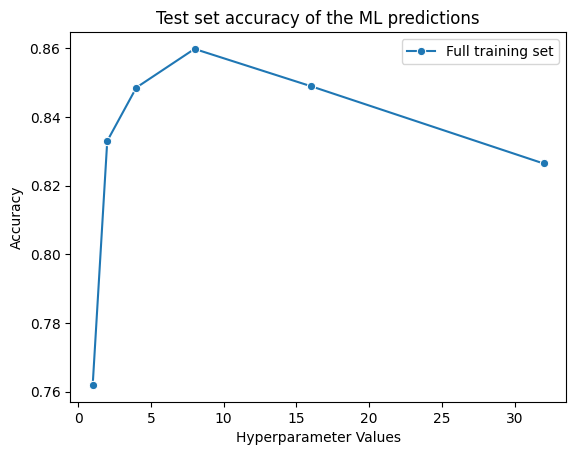

In [12]:
param_values = [1, 2, 4, 8, 16, 32]
acc_scores = []
for n in param_values:
    acc_scores.append(train_test_DT(X_train, X_test, y_train, y_test, n))

visualize_accuracy(param_values, acc_scores)

The best depth value is around 10 with an accuracy of 0